In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("jgbcm_all.csv", encoding="cp932")

In [10]:
header = df.iloc[0]
data = df.iloc[1:].copy()
data.columns = header

In [11]:
data = data.rename(columns={"基準日": "date"})
data.set_index("date", inplace=True)

In [12]:
data = data.replace("-", pd.NA)

In [13]:
num_df = data.astype("Float64")

In [14]:
num_df_clean = num_df.dropna()

In [15]:
print("形状（行数×満期数）:", num_df_clean.shape)

形状（行数×満期数）: (4418, 15)


In [16]:
pca = PCA(n_components=3)
components = pca.fit_transform(num_df_clean.to_numpy())

explained = pca.explained_variance_ratio_
print("各主成分の寄与率:", explained)

pc_df = pd.DataFrame(
    components,
    columns=["Level", "Slope", "Curvature"],
    index=num_df_clean.index
)

各主成分の寄与率: [0.96584295 0.02321436 0.00859213]


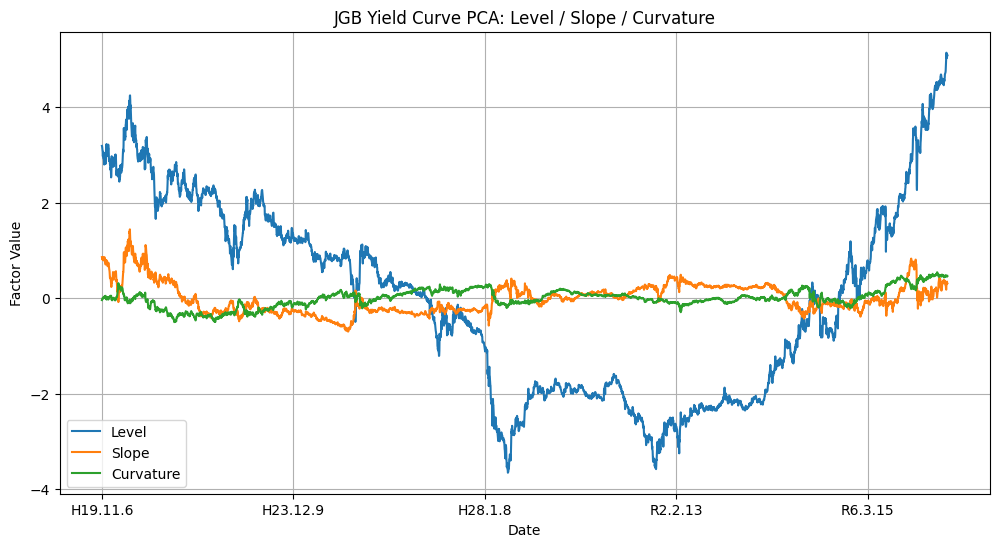

In [17]:
pc_df.plot(figsize=(12, 6))
plt.title("JGB Yield Curve PCA: Level / Slope / Curvature")
plt.xlabel("Date")
plt.ylabel("Factor Value")
plt.grid(True)
plt.show()